### **To verify linear independence of Eigenvectors of matrix**

## Problem statement:

 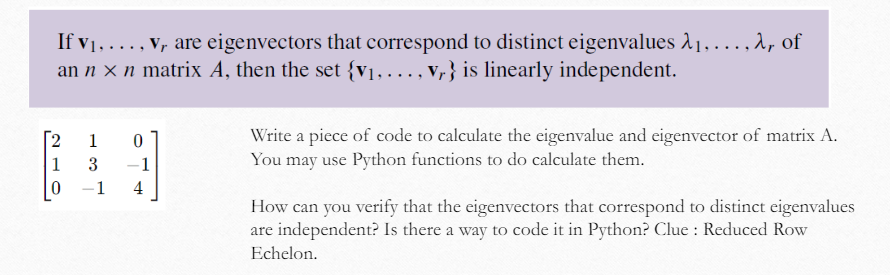



##Solution overview:


1.   Import **numpy** and declaration of matrix to be used.
2.   **np.linalg.eig()**: Calculation of **eigenvalues** and **eigenvectors** for the given matrix using the function.
3.   Verify whether all the **eigenvalues are distinct**.
4.   Arrange the **eigenvectors as a column** in the matrix.
5.   Reduce the matrix to Reduced Row Echelon Form(**RREF**).
6.   If **pivot_column_count == eigenvectors_count** then the eigenvectors are **independent**.

##Solution:

**Library and matrix**

In [31]:
#Import necessary library
import numpy as np
#Declare the matrix of computation
A = np.array([[2,1,0],[1,3,-1],[0,-1,4]])
A

array([[ 2,  1,  0],
       [ 1,  3, -1],
       [ 0, -1,  4]])

**Calculation of eigenvalues and eigenvectors**

In [32]:
#Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print the first eigenvalue and its corresponding eigenvector
print("Eigenvalue 1:", eigenvalues[0])
print("Eigenvector 1:")
print(eigenvectors[:, 0])

# Print the second eigenvalue and its corresponding eigenvector
print("\nEigenvalue 2:", eigenvalues[1])
print("Eigenvector 2:")
print(eigenvectors[:, 1])

# Print the third eigenvalue and its corresponding eigenvector
print("\nEigenvalue 3:", eigenvalues[2])
print("Eigenvector 3:")
print(eigenvectors[:, 2])

Eigenvalue 1: 1.2679491924311224
Eigenvector 1:
[-0.78867513  0.57735027  0.21132487]

Eigenvalue 2: 3.0
Eigenvector 2:
[-0.57735027 -0.57735027 -0.57735027]

Eigenvalue 3: 4.732050807568877
Eigenvector 3:
[-0.21132487 -0.57735027  0.78867513]


np.linalg.eig() ensures that the eigenvalue at index i corresponds to the eigenvector at index i

In [33]:
# Check if all eigenvalues are distinct
if len(set(eigenvalues)) == len(eigenvalues):
    print("All eigenvalues are distinct.")
else:
    print("Not all eigenvalues are distinct.")

All eigenvalues are distinct.


set(): removes any duplicate values.

If the number of unique eigenvalues is equal to the total number of eigenvalues, it means that all eigenvalues are distinct.

2 ways to arrange **eigenvectors as columns** in matrix

In [34]:
# Method 1

# Performing transpose() on eigenvector matrix
eigenvectors_as_column=np.transpose(eigenvectors)
print(eigenvectors_as_column)

[[-0.78867513  0.57735027  0.21132487]
 [-0.57735027 -0.57735027 -0.57735027]
 [-0.21132487 -0.57735027  0.78867513]]


In [35]:
# Method 2

# Use of column_stack()
eigenvectors_matrix = np.column_stack(eigenvectors)
print(eigenvectors_matrix)

[[-0.78867513  0.57735027  0.21132487]
 [-0.57735027 -0.57735027 -0.57735027]
 [-0.21132487 -0.57735027  0.78867513]]


2 ways to arrive at **RREF**

In [36]:
# Method 1

#Manual implementation of row reduction algorithm
def rref(matrix):
    m, n = matrix.shape
    lead = 0

    for r in range(m):
        if lead >= n:
            break

        # Find the pivot row
        i = r
        while matrix[i, lead] == 0:
            i += 1
            if i == m:
                i = r
                lead += 1
                if n == lead:
                    return matrix

        # Swap the pivot row
        matrix[[i, r]] = matrix[[r, i]]

        # Normalize the pivot row
        matrix[r] = matrix[r] / matrix[r, lead]

        # Eliminate other entries in the pivot column
        for i in range(m):
            if i != r:
                matrix[i] -= matrix[r] * matrix[i, lead]

        lead += 1

    return matrix

rref_A = rref(eigenvectors_as_column)
print("RREF of A:")
print(rref_A)


RREF of A:
[[ 1.  0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]


In [37]:
# Method 2

#Using rref() of sympy library
import sympy
rref, _ = sympy.Matrix(eigenvectors_matrix).rref()
print("RREF of A:")
print(rref)

RREF of A:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


**Verification of linear independence**

In [38]:
#verification of linear independence of vectors through equating pivot_column_count and eigenvectors_count

def is_linearly_independent(rref_matrix):
    # Count the number of pivot columns (leading non-zero entries in each row)
    pivot_count = sum(any(row) for row in rref_matrix)

    # Compare with the number of vectors
    if pivot_count == rref_matrix.shape[1]:
        return True  # Vectors are linearly independent
    else:
        return False  # Vectors are linearly dependent


if is_linearly_independent(rref_A):
    print("Eigenvectors are linearly independent.")
else:
    print("Eigenvectors are linearly dependent.")


Eigenvectors are linearly independent.
